# Graph Convolutional Networks Basics

<img src="./picture_sources/0.PNG" width=300px align="left"></img>

In [2]:
import numpy as np

# 1: 有被指，0: 沒有被指
graph = np.matrix(
    [[0, 0, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 1, 0, 0]],
    dtype = float
)

print("graph relations\n", graph)

feature = np.matrix([[i, -i] for i in range(graph.shape[0])], dtype=float)

print("\nfeature matrix\n", feature)
print("\noutput\n", graph * feature)

# 這個矩陣乘法代表了對於每個節點來說，它們的值代表了每個指向該節點的節點們的特徵總和。
# 舉例而言，節點 1 的值[ 2., -2.]，即為指向它的節點 0與節點 2 加總而得([ 0., 0.] + [ 2., -2.])。
# 這邊可以自己算算看會更有感覺。

I = np.matrix(np.eye(graph .shape[0]))
# graph relation matrix with self-added
graph_hat = graph + I
print("\ngraph relation hat\n", graph_hat)

D = np.array(np.sum(graph_hat, axis=1)).reshape(-1)
D = np.matrix(np.diag(D))
print("\nD\n", D)

print("\nresult\n", (D ** -1) * graph_hat)

graph relations
 [[0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]

feature matrix
 [[ 0.  0.]
 [ 1. -1.]
 [ 2. -2.]
 [ 3. -3.]]

output
 [[ 3. -3.]
 [ 2. -2.]
 [ 4. -4.]
 [ 1. -1.]]

graph relation hat
 [[1. 0. 0. 1.]
 [1. 1. 1. 0.]
 [0. 1. 1. 1.]
 [0. 1. 0. 1.]]

D
 [[2. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 2.]]

result
 [[0.5        0.         0.         0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.5        0.         0.5       ]]


# Basic GCN Model

In [4]:
'''
dataset website:
http://konect.cc/networks/ucidata-zachary/
http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#zachary
http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/zachary.dat
'''
import numpy as np

# zache matrix
file = open("./datasets/zach/ZACHE", "r")
zache = []
for line in file:
    line_list = line.split(" ")[1:]
    new_line_list = []
    for i, j in enumerate(line_list):
        j = int(j.split('\n')[0])
        new_line_list.append(j)
    zache.append(new_line_list)
zache = np.matrix(zache)
# print(zache)

# zache matrix
file = open("./datasets/zach/ZACHC", "r")
zachc = []
for line in file:
    line_list = line.split(" ")[1:]
    new_line_list = []
    for i, j in enumerate(line_list):
        j = int(j.split('\n')[0])
        new_line_list.append(j)
    zachc.append(new_line_list)
zachc = np.matrix(zachc)
# print(zachc.shape)

I = np.eye(zache.shape[0])
zache = zache + I
D_hat = np.array(np.sum(zache, 1)).reshape(-1)
D_hat = np.matrix(np.diag(D_hat))
W_1 = np.random.normal(loc=0, scale=1, size=(zache.shape[0], 4)) # 維度=(節點數, 特徵數)
W_2 = np.random.normal(loc=0, scale=1, size=(4, 2))

In [5]:
import numpy as np

def relu(x): # 定義 ReLU 函數
    return np.maximum(x,0)

def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

[[0.05835726 0.33274088 0.02269147 0.11798093]
 [0.3058018  0.20222006 0.         0.        ]
 [0.03124357 0.07463454 0.         0.        ]
 [0.         0.42330219 0.         0.04356572]
 [0.         0.05517959 0.39588004 0.74721725]
 [0.13927861 0.2251093  0.00553041 0.78289602]
 [0.         0.14313735 0.         0.93031505]
 [0.1880894  0.81415859 0.         0.29715824]
 [0.55287346 0.26261205 0.02838389 0.01502366]
 [0.68362316 0.46168648 0.         0.21732859]
 [0.         0.10088299 0.61153285 1.13000424]
 [0.         1.3452516  0.         0.42950655]
 [0.         0.60056013 0.         0.85296269]
 [0.34645184 0.39035907 0.         0.17125998]
 [0.18971683 0.         0.         0.67274332]
 [0.45252236 0.85944649 0.         0.61715432]
 [0.586052   0.06536365 0.         0.53210685]
 [0.38278772 0.46393639 0.30170051 0.89060359]
 [0.69847676 0.         0.         0.89331487]
 [0.47253362 0.         0.         1.11135934]
 [0.45361875 0.1748231  0.         0.66067135]
 [0.         

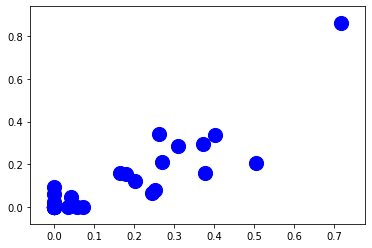

In [8]:
import matplotlib.pyplot as plt

A_hat = zache

# 維度=(節點數, 特徵數)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
print(H_1)
print(H_1.shape)
# 最後要分兩群，所以維度定為(前一層特徵數, 2)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
print("\n", H_2)
print(H_2.shape)

output = H_2
# print(type(output)) 

feature_representations = {
    node: np.array(output)[node] 
    for node in range(zache.shape[0])}

# print(feature_representations)
# print(type(feature_representations))

list_x = []
list_y = []

for i, j in enumerate(output.tolist()):
    list_x.append(j[0])
    list_y.append(j[1])
        
plt.scatter(list_x, list_y, c="blue", s=200)
plt.show()